### Road Network Analysis

***
Practical prepared by Mateo Neira
***

Intro into **OSMnx**, a python library to parse [OpenStreetMap](https://www.openstreetmap.org/) data.

In [2]:
import networkx as nx
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Street Network analysis


![street network representation](street_networks.png)

from: [Street Network Studies: from Networks to Models and their Representations](https://link.springer.com/article/10.1007/s11067-018-9427-9)

#### the OSMnx library

Python library that lets you download spatial data from OpenStreetMap and analyze street networks.
https://osmnx.readthedocs.io/en/stable/

OSMnx is built on top of GeoPandas, and Networkx:
* Downloads and creates a networkx graph ofstreet networks or other infrastructure networks
    * Automatically cleans(topologically corrects) the network for you. 
* Download any other spatial geometries (buildings, POI's, place boundaries)


In [4]:
# We can build a graph by giving the name of the place
G = ox.graph_from_place('Oxford, UK', network_type='drive')
print(type(G))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


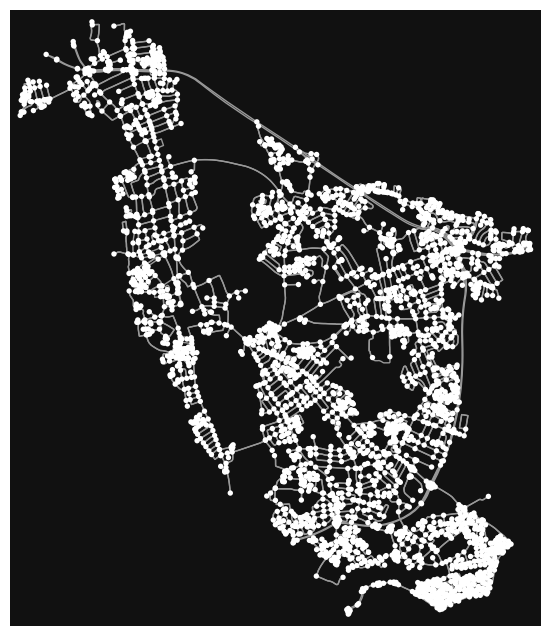

In [5]:
fig, ax = ox.plot_graph(G)

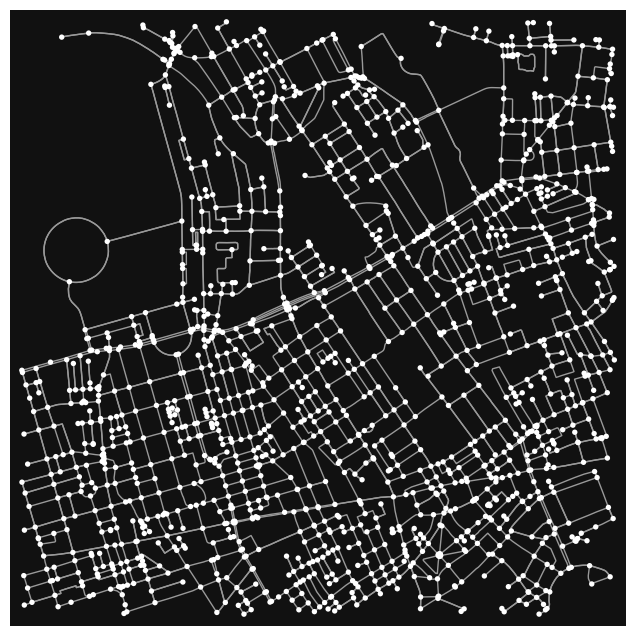

In [6]:
# We can also build a graph by giving the coordinates and a radius
ucl = (51.5245593,-0.1358805)
radius = 1500 #meters
G = ox.graph_from_point(ucl, dist=radius, network_type='drive')
fig, ax = ox.plot_graph(G)

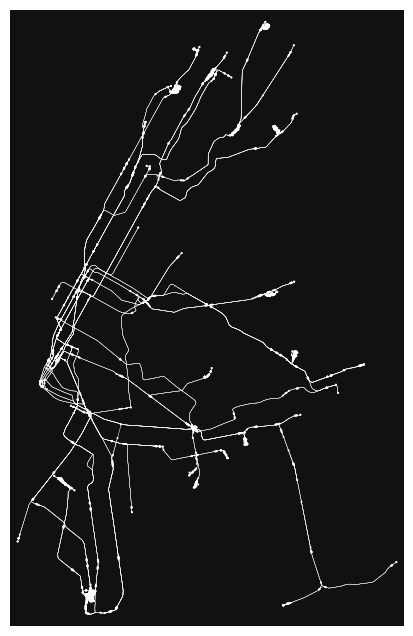

In [7]:
# We can also get other infrastructure networks
# change the overpass query to meet the new style 'New York, NY, USA'
G = ox.graph_from_place('New York, NY, USA',
                        retain_all=False, truncate_by_edge=True, simplify=True,
                        custom_filter='["railway"~"subway"]')

fig, ax = ox.plot_graph(G, node_size=2, edge_color='w', edge_linewidth=0.2)

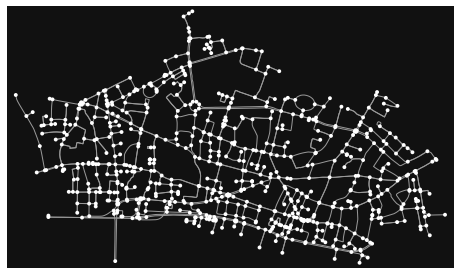

In [3]:
# now onto community detection in street networks
# to keep it light, we will only be using the city of London
place = 'City of London, Greater London, England, United Kingdom'

G = ox.graph_from_place(place, network_type='drive', simplify=True)
fig, ax = ox.plot_graph(G)

In [9]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G)
stats

{'n': 693,
 'm': 1383,
 'k_avg': 3.9913419913419914,
 'edge_length_total': 82074.4170000001,
 'edge_length_avg': 59.34520390455539,
 'streets_per_node_avg': 2.6507936507936507,
 'streets_per_node_counts': {0: 0, 1: 135, 2: 46, 3: 440, 4: 70, 5: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.19480519480519481,
  2: 0.06637806637806638,
  3: 0.6349206349206349,
  4: 0.10101010101010101,
  5: 0.002886002886002886},
 'intersection_count': 558,
 'street_length_total': 55046.48599999999,
 'street_segment_count': 902,
 'street_length_avg': 61.0271463414634,
 'circuity_avg': 1.04571992419804,
 'self_loop_proportion': 0.0022172949002217295}

**Exercise**

We have shown you how to build a query to Open Street Map using `custom_filter`, for future reference look at this [table](https://wiki.openstreetmap.org/wiki/Map_features) that shows the names of OSM features that you can select.

1. Now select your city and construct the road network
2. Extract the metro network from that city

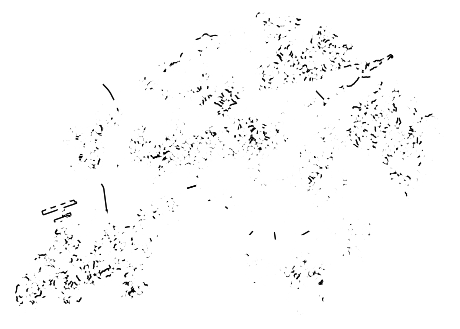

In [8]:
#Hong Kong
G=ox.graph_from_place('Hong Kong')
fig, ax = ox.plot_graph(G, edge_color='black', bgcolor='w')

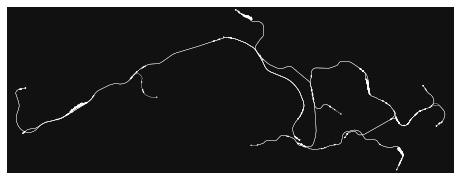

In [6]:
G = ox.graph_from_place('Hong Kong',
                        retain_all=False, truncate_by_edge=True, simplify=True,
                        custom_filter='["railway"~"subway"]')

fig, ax = ox.plot_graph(G, node_size=2, edge_color='w', edge_linewidth=0.2)

![Metro in Hong Kong](Hong_Kong_metro.svg)

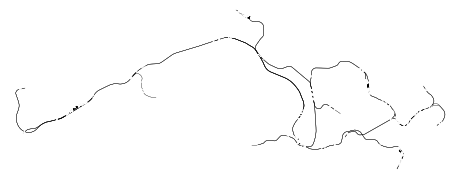

In [7]:
#Tuen Ma line and Light Rail are missing. This could be a solution
G = ox.graph_from_place('Hong Kong',
                        retain_all=False, truncate_by_edge=True, simplify=True,
                        custom_filter='["railway"~"subway|light_rail"]')

fig, ax = ox.plot_graph(G, node_size=2, edge_color='black', bgcolor='w', edge_linewidth=0.2)

**Extra things that you can do**

In [7]:
# get building footprints for the city of London
buildings = ox.geometries_from_place(place, tags={'building':True})
# get amenities for the city of London
amenities = ox.geometries_from_place(place, tags={'amenity':True, 'geometry':'point'})


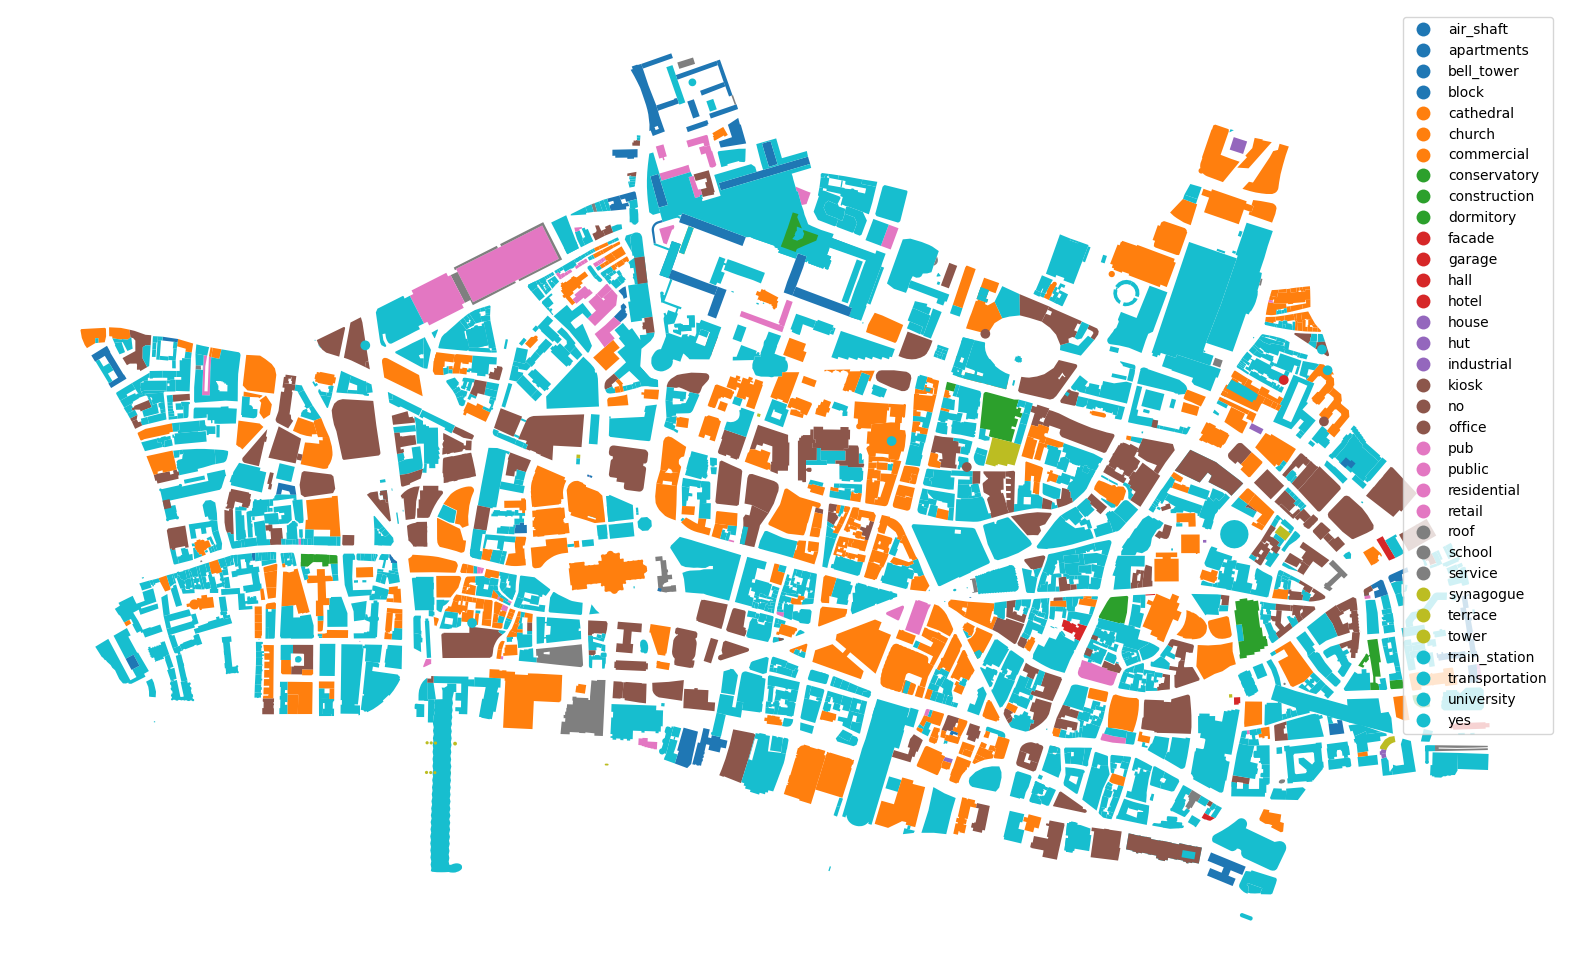

In [11]:
ax = buildings.plot(column='building', figsize=(20, 20), legend=True)
ax.set_axis_off()

/var/folders/85/qwxqq_js7zlfvgcsrmsf23t80000gn/T/ipykernel_53348/459010638.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  st_pauls = buildings[buildings.name.str.contains("St Paul's Cathedral", na=False)].geometry.centroid
/var/folders/85/qwxqq_js7zlfvgcsrmsf23t80000gn/T/ipykernel_53348/459010638.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  finsbury = amenities[amenities.name.str.contains("Finsbury", na=False)].geometry.centroid
/var/folders/85/qwxqq_js7zlfvgcsrmsf23t80000gn/T/ipykernel_53348/459010638.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a

element_type  osmid    
way           160621947    POINT (-0.09680 51.51369)
              369161987    POINT (-0.09848 51.51377)
dtype: geometry
element_type  osmid    
node          883627406    POINT (-0.08666 51.51713)
dtype: geometry
18468951
3741078112


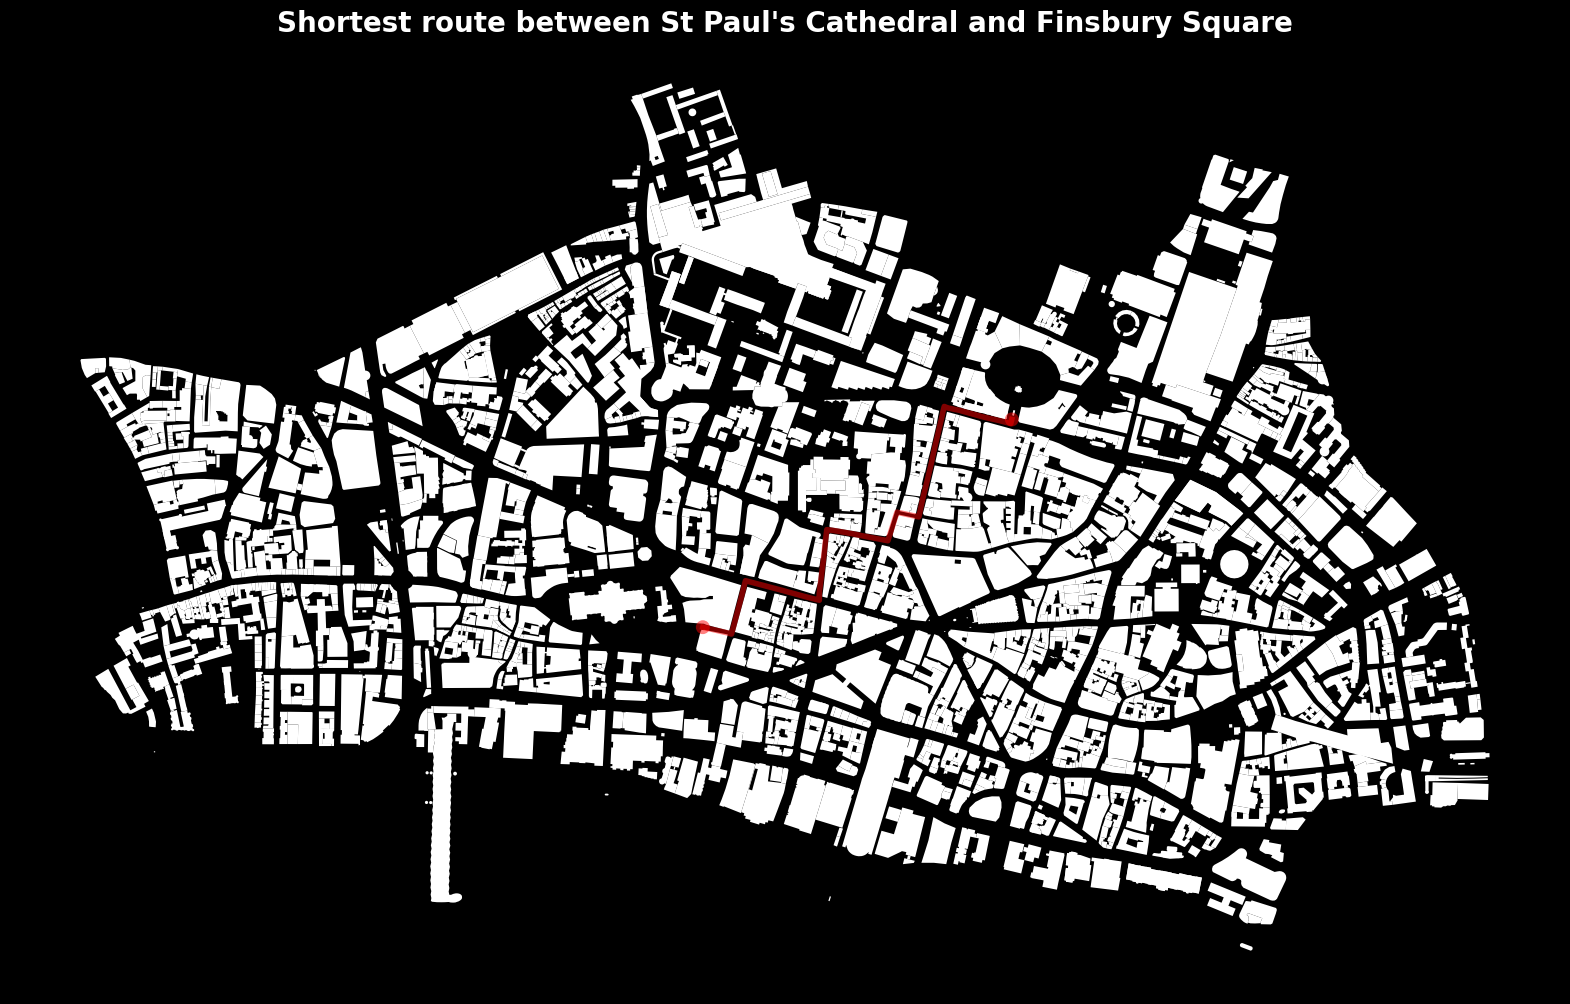

(<Figure size 2000x2000 with 1 Axes>,
 <Axes: title={'center': "Shortest route between St Paul's Cathedral and Finsbury Square"}>)

In [16]:
st_pauls = buildings[buildings.name.str.contains("St Paul's Cathedral", na=False)].geometry.centroid
finsbury = amenities[amenities.name.str.contains("Finsbury", na=False)].geometry.centroid
print(st_pauls)
print(finsbury)

# get the nearest node to the centroid of St Paul's Cathedral
st_pauls = ox.nearest_nodes(G, st_pauls.x[0], st_pauls.y[0])
print(st_pauls)
# get the nearest node to the centroid of Lloyd's of London
finsbury = ox.nearest_nodes(G, finsbury.x[0], finsbury.y[0])
print(finsbury)

# get the shortest path between the two nodes
route = nx.shortest_path(G, st_pauls, finsbury, weight='length')

# plot the route
fig, ax = plt.subplots(1, 1, figsize=(20, 20), facecolor='k', subplot_kw=dict(aspect='equal'))

# clean it up
ax.set_facecolor('k')
ax.set_axis_off()

# add a title
ax.set_title('Shortest route between St Paul\'s Cathedral and Finsbury Square', fontsize=20, color='w', fontweight='bold')

buildings.plot(color='w', ax=ax)
ox.plot_graph_route(G, route, node_size=2, ax=ax)



In [20]:
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

In [21]:
# get pairs in route in moving window of 2
pairs = [(route[i], route[i+1], 0) for i in range(len(route)-1)]

# the edges index has this weird format, with u, v (for nodes) and then an odd 0
print(edges.index[0])
# so we match it
print(pairs[0])
# # osmnx also has a function to do this, but you're better than that
# pairs = ox.utils_graph.get_route_edge_attributes(G, route, 'length')

# look up the edge data for each pair using the 2 index values u, v
paths = edges[edges.index.isin(pairs)]

# how long is the journey?
paths['length'].sum()

# now we can add distances like this into our gravity models

(104318, 7946372941, 0)
(18468951, 109785, 0)


1065.823

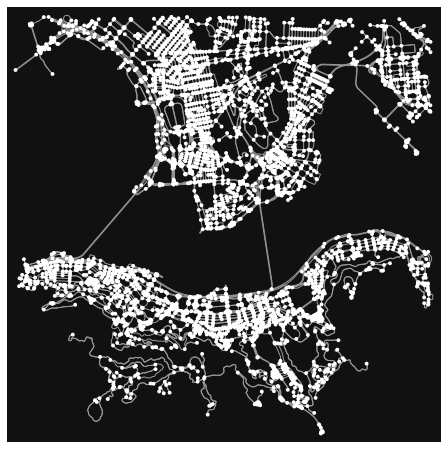

In [78]:
#Visualise part of hong kong as per map
#East Tsim Sha Tsui
center=(22.29524248409648, 114.17351895299552)
radius=4184.29
G = ox.graph_from_point(center, dist=radius, network_type='drive')
fig, ax = ox.plot_graph(G)

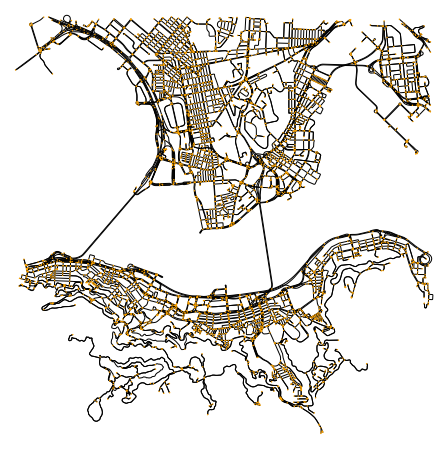

In [77]:
center=(22.29524248409648, 114.17351895299552)
radius=4184.29
G = ox.graph_from_point(center, dist=radius, network_type='drive')
fig, ax = ox.plot_graph(G, node_size=2, edge_color='black', bgcolor='w', node_color='orange')

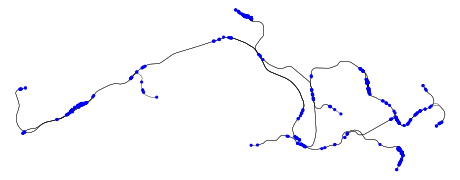

In [47]:
metro_HK = ox.graph_from_place('Hong Kong',
                        retain_all=False, truncate_by_edge=True, simplify=True,
                        custom_filter='["railway"~"subway"]')

fig, ax = ox.plot_graph(metro_HK, node_size=10, edge_color='black', bgcolor='w', node_color='b',edge_linewidth=0.2)

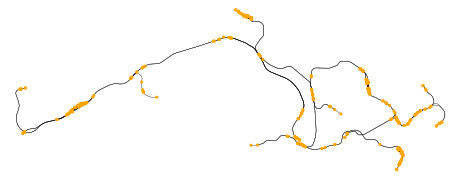

In [4]:
metro_HK = ox.graph_from_place('Hong Kong',
                        retain_all=False, truncate_by_edge=True, simplify=True,
                        custom_filter='["railway"~"subway"]')

fig, ax = ox.plot_graph(metro_HK, node_size=10, edge_color='black', bgcolor='w', node_color='orange',edge_linewidth=0.2)

In [12]:
bc=nx.betweenness_centrality(ox.convert.to_digraph(metro_HK), weight='length')
nx.set_node_attributes(metro_HK, bc, "bc")
nc = ox.plot.get_node_colors_by_attr(metro_HK, "bc", cmap="plasma")
fig, ax = ox.plot_graph(
    metro_HK,
    node_color=nc,
    node_size=10,
    node_zorder=2,
    edge_linewidth=0.2,
    edge_color="w",
)

AttributeError: module 'osmnx' has no attribute 'convert'

In [55]:
type(metro_HK)

networkx.classes.multidigraph.MultiDiGraph

In [56]:
list(metro_HK.nodes(data=True))[0]

(257006534, {'y': 22.2810848, 'x': 114.2229451, 'street_count': 4})

In [76]:
nx.get_node_attributes(metro_HK, 'x')

{257006534: 114.2229451,
 278952081: 114.1584753,
 288379181: 114.1696288,
 288704407: 114.2076234,
 288706017: 114.237233,
 288706018: 114.2377656,
 288706020: 114.2382124,
 307391101: 114.2621981,
 307394053: 114.2513519,
 307394423: 114.2466169,
 307394424: 114.2450104,
 307394816: 114.2568642,
 311742440: 114.2714233,
 361384200: 114.2674249,
 474660446: 114.2150017,
 527732826: 114.16139,
 984741544: 114.25233,
 991294703: 114.2380883,
 1280476255: 114.212895,
 1280476307: 114.2129662,
 1280476375: 114.2128191,
 1280476396: 114.2131516,
 1280476524: 114.2126295,
 1280476546: 114.2134552,
 1280476575: 114.212901,
 1280476588: 114.2133097,
 1280476800: 114.2128545,
 1280476846: 114.2132929,
 1280476962: 114.2128988,
 1280476991: 114.2127277,
 1393333556: 114.2139831,
 1393333583: 114.2137326,
 1393333585: 114.2139945,
 1393333612: 114.2140215,
 1393333661: 114.2137644,
 1703839522: 114.2505491,
 1808669604: 114.2408273,
 1808669607: 114.2404272,
 1808669611: 114.2407357,
 1808669613

KeyError: 257006534

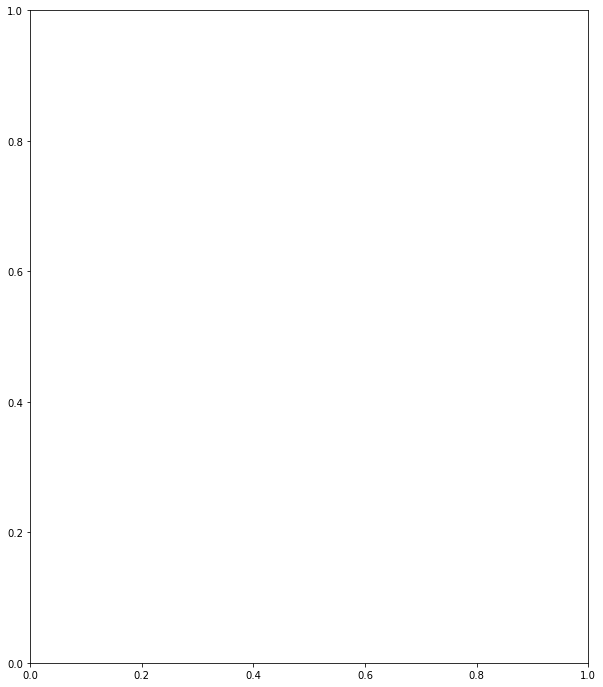

In [66]:
#normalised degree centrality
deg_HK_norm =nx.degree_centrality(metro_HK)


nx.set_node_attributes(metro_HK,dict(deg_HK_norm),'degree_norm')

deg_color_norm=[(node['degree_norm']) for i, node in metro_HK.nodes(data=True)]
deg_size_norm=[(node['degree_norm']*1000) for i, node in metro_HK.nodes(data=True)]


fig, ax = plt.subplots(figsize=(10,12))

nx.draw_networkx_edges(metro_HK, pos,edge_color='black', 
        width=0.4)
nod=nx.draw_networkx_nodes(metro_HK,
        pos = pos,
        node_color= deg_color_norm,
        node_size= deg_size_norm)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Network of HK metro with normalised degree centrality",fontsize=15)
plt.show()



KeyError: 257006534

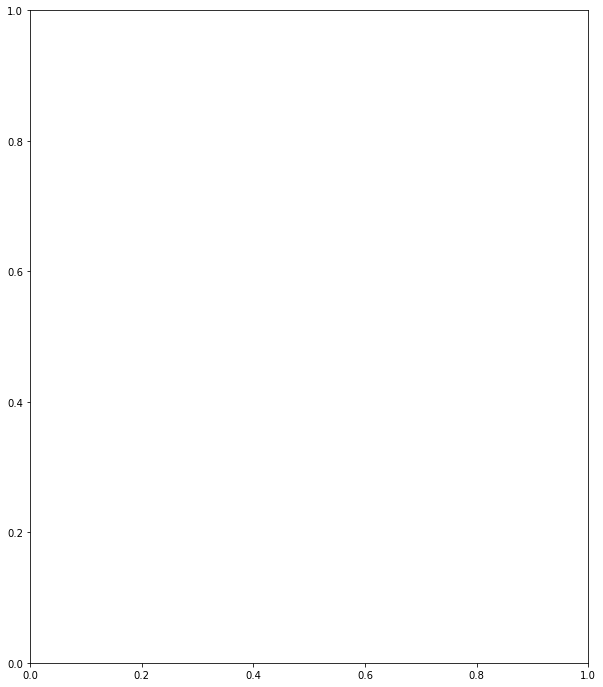

In [69]:
#normalised degree centrality
G_undirected = nx.Graph(metro_HK)
deg_HK_norm =nx.degree_centrality(G_undirected)


nx.set_node_attributes(G_undirected,dict(deg_HK_norm),'degree_norm')

deg_color_norm=[(node['degree_norm']) for i, node in G_undirected.nodes(data=True)]
deg_size_norm=[(node['degree_norm']*1000) for i, node in G_undirected.nodes(data=True)]


fig, ax = plt.subplots(figsize=(10,12))

nx.draw_networkx_edges(G_undirected, pos,edge_color='black', 
        width=0.4)
nod=nx.draw_networkx_nodes(G_undirected,
        pos = pos,
        node_color= deg_color_norm,
        node_size= deg_size_norm)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Network of HK metro with normalised degree centrality",fontsize=15)
plt.show()

In [53]:
list(metro_HK.nodes(data=True))[0]

(257006534, {'y': 22.2810848, 'x': 114.2229451, 'street_count': 4})